<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/image_prorcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.


In [1]:
import numpy as np
import pandas as pd
import cv2 as cv # openCV package
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import urllib

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

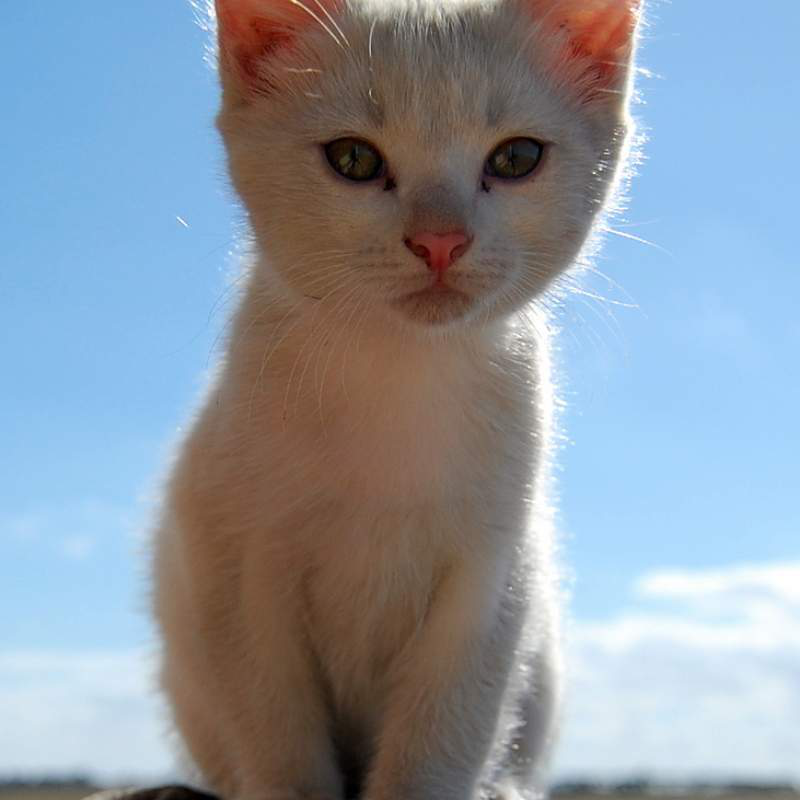

In [2]:
url = "https://placekitten.com/800"\
# cv.imread: BRG format, mpimg.imread: RGB format
image_BRG = io.imread(url)
image_RGB = cv.cvtColor(image_BRG, cv.COLOR_BGR2RGB)
image = image_RGB
cv2_imshow(image)

##Step3: Image Contours and Histograms

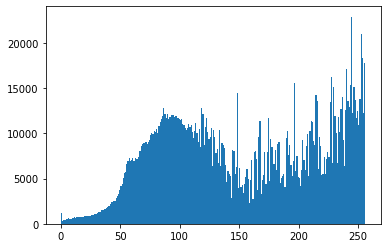

In [3]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

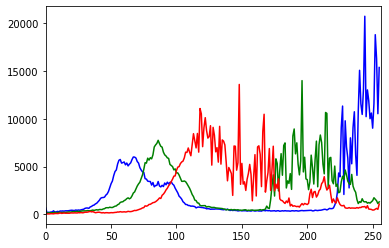

In [4]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

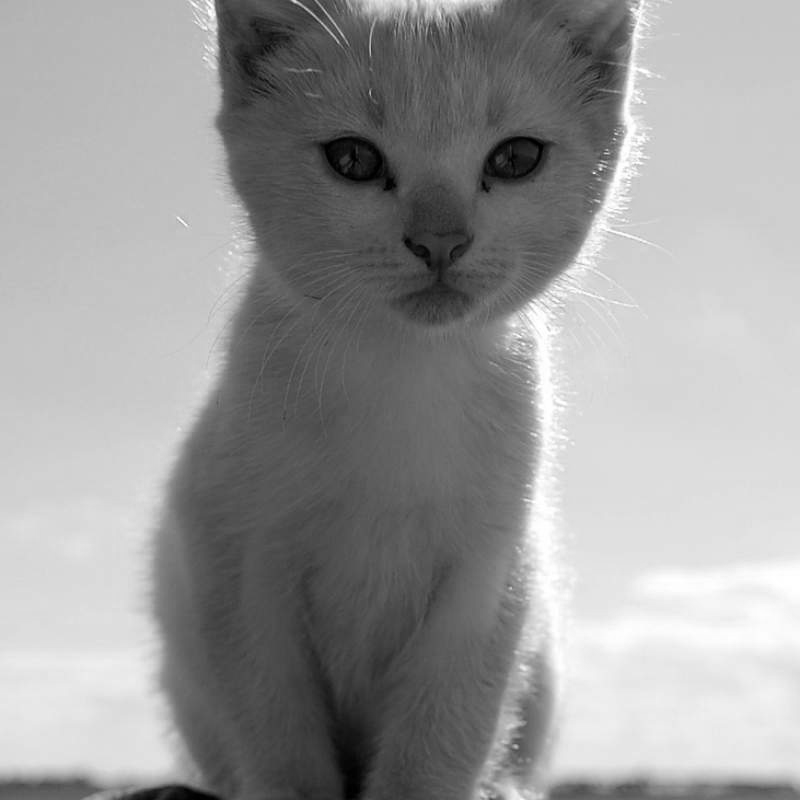

In [6]:
image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
cv2_imshow(image_gray)

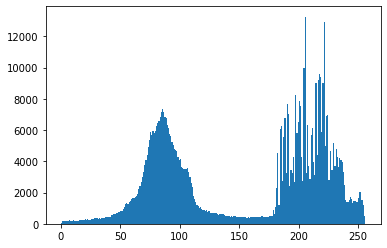

In [7]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(image_gray.ravel(),bins = 256, range = [0, 256])
plt.show()

(0.5, 799.5, 0.5, 799.5)

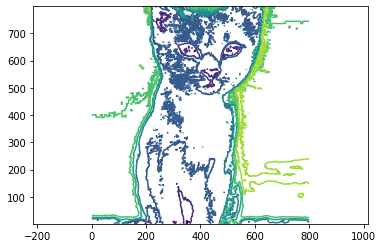

In [9]:
plt.contour(image_gray, origin = "image")
plt.axis("equal")

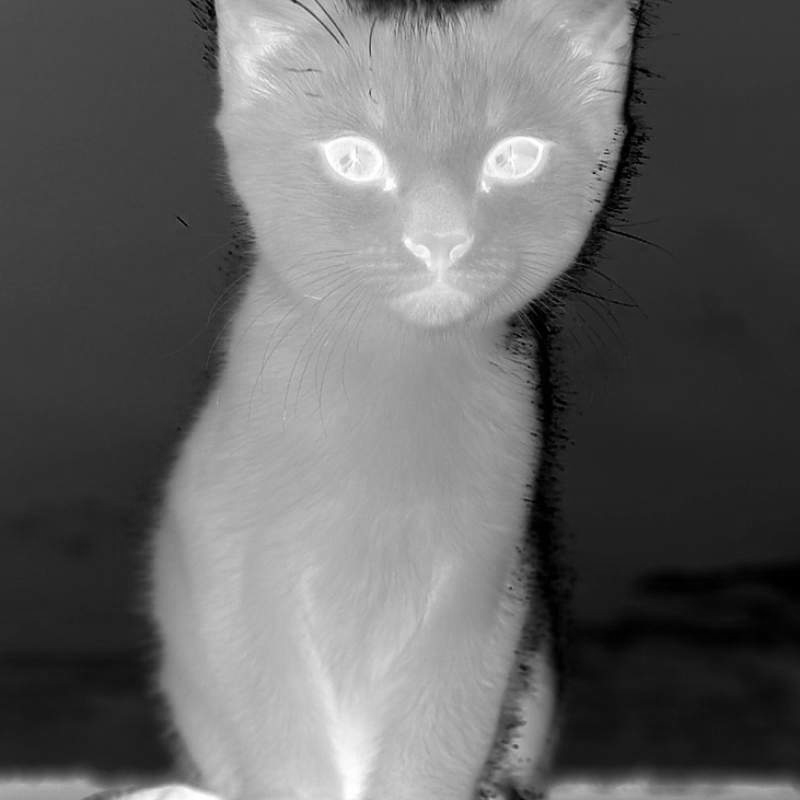

In [21]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - image_gray
cv2_imshow(im2)

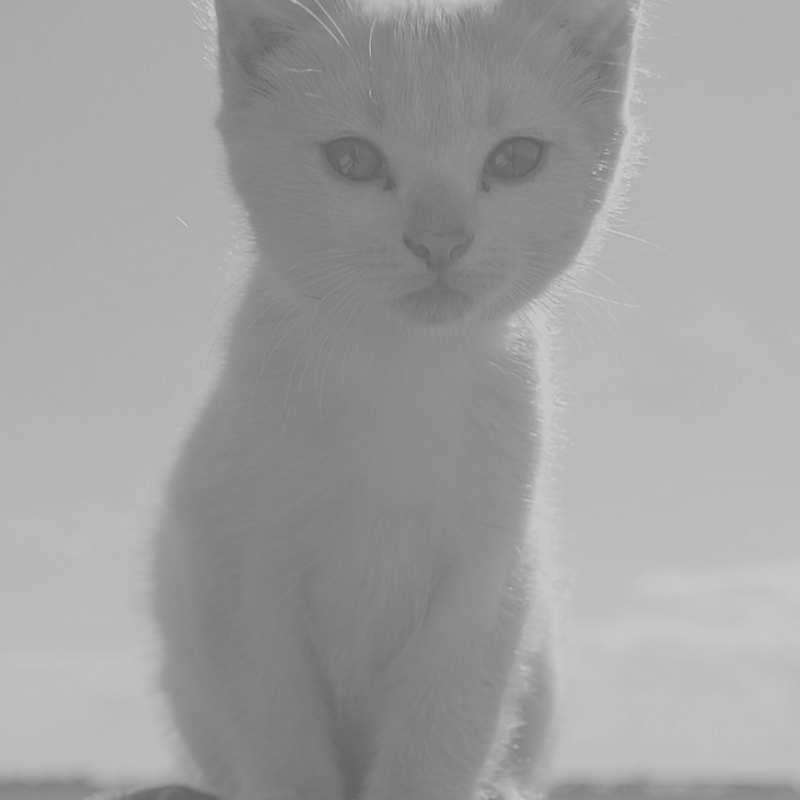

In [23]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*image_gray + 100
cv2_imshow(im3)

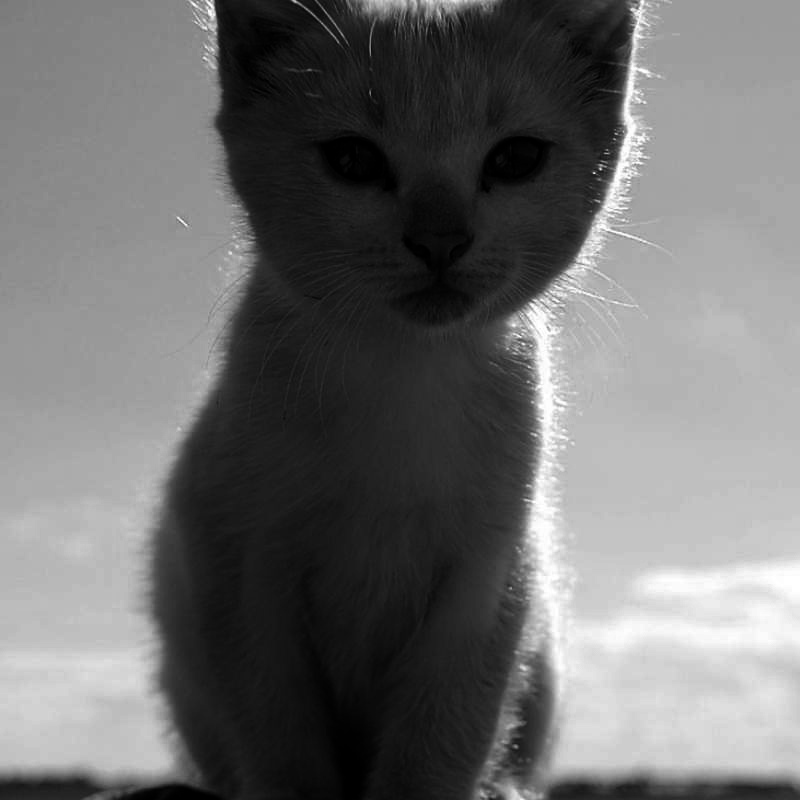

In [25]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(image_gray/255.0)**2
cv2_imshow(im4)

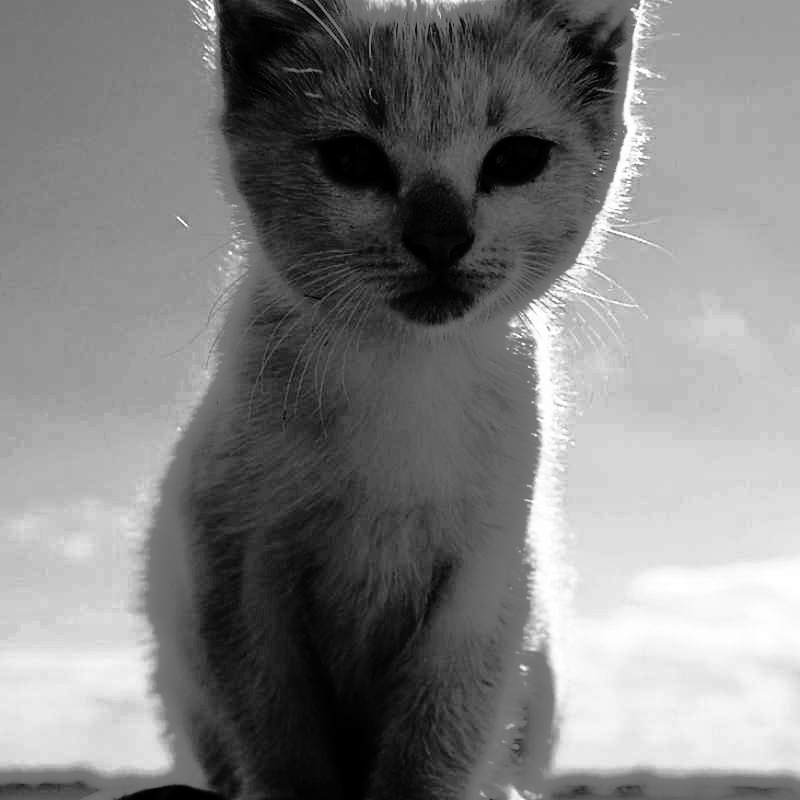

In [26]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

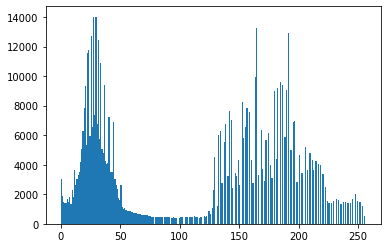

In [27]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

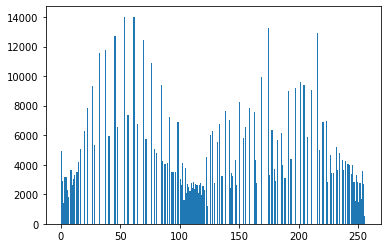

In [28]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

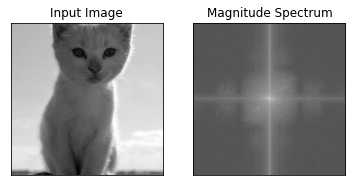

In [30]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(image_gray,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

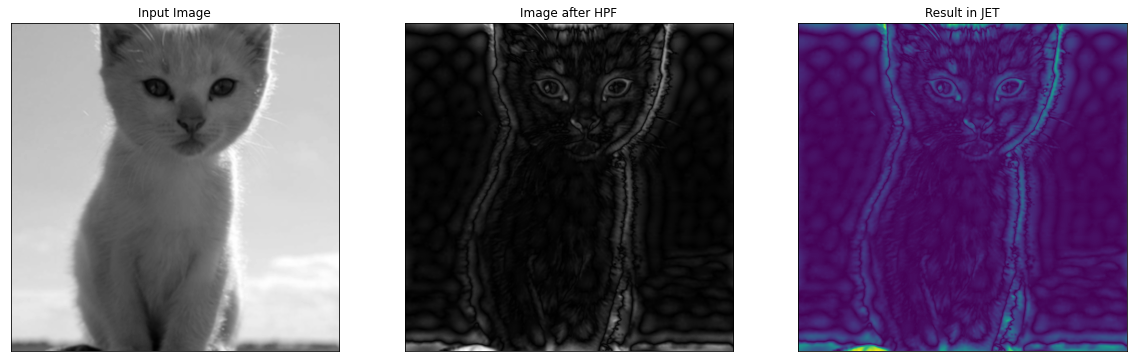

In [31]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()